## ZINC Data of *Plasmodium falciparum* Dihydrofolate Reductase Inhibitors

Unfortunately, no API method for retrieving the data of ZINC database is currently available, so I did a manual search for experimental observations of the target: Dihydrofolate Reductase (Bifunctional) for *P. falciparum*.

The method used was to find the UniProt ID for the target of interest and search by it's respective associated gene. The following information was used to fetch the data:
* **UniProt ID:** P13922
* **Gene:** DRTS_PLAFK

Then we download the [ZINC data](https://zinc.docking.org/genes/DRTS_PLAFK/observations/) using the *gene* tag and a 'csv' and 'sdf' file was manually saved.

The csv file contains the ZINC IDs and the respective activity but it does not contain any information about the structure and that's why we need to download the .sdf file.

### Importing the libraries

We're basically going to need some tools from `RDKit` and `pandas` library. So we import them:

In [1]:
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import Chem

### Importing the data

First we need to import the SDF data and it is always important to take a look at the variable types:

In [2]:
# Reading the csv data using pandas
zinc_plasmodium_sdf = PandasTools.LoadSDF('data/MANUAL_plasmodium_dhfr_zinc_structures.sdf')
zinc_plasmodium_sdf.dtypes

zinc_id                object
ortholog_name          object
gene_name              object
affinity               object
chembldocid            object
title                  object
reference.pubmed_id    object
reference.doi          object
reference.chembl_id    object
reference.journal      object
reference.year         object
ID                     object
ROMol                  object
dtype: object

Taking a look at the variable types and a good look into the dataset we can see that there are a lot of observations (> 1000) but a lot of these observations come from the same strucutre. We have two alternatives here, to keep only one affinity measurement arbitrarly or take the mean of the group and proceed with further analysis.

,zinc_id,ortholog_name,gene_name,affinity,chembldocid,title,reference.pubmed_id,reference.doi,reference.chembl_id,reference.journal,reference.year,ID,ROMol
0,ZINC000000001233,DRTS_PLAFK,DRTS_PLAFK,8.96,21047,None,15293997,None,CHEMBL1138679,J. Med. Chem.,2004,,
1,ZINC000000001233,DRTS_PLAFK,DRTS_PLAFK,8.82,15522,None,10893311,None,CHEMBL1133696,J. Med. Chem.,2000,,
2,ZINC000000001233,DRTS_PLAFK,DRTS_PLAFK,8.82,17662,None,14736247,None,CHEMBL1138835,J. Med. Chem.,2004,,
3,ZINC000000001233,DRTS_PLAFK,DRTS_PLAFK,8.80,17071,None,12825927,None,CHEMBL1145823,J. Med. Chem.,2003,,
4,ZINC000000001233,DRTS_PLAFK,DRTS_PLAFK,5.94,17071,None,12825927,None,CHEMBL1145823,J. Med. Chem.,2003,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,ZINC000034801986,DRTS_PLAFK,DRTS_PLAFK,6.48,17662,None,14736247,None,CHEMBL1138835,J. Med. Chem.,2004,,
1139,ZINC000034801986,DRTS_PLAFK,DRTS_PLAFK,8.40,17662,None,14736247,None,CHEMBL1138835,J. Med. Chem.,2004,,
1140,ZINC000034801986,DRTS_PLAFK,DRTS_PLAFK,7.40,17662,None,14736247,None,CHEMBL1138835,J. Med. Chem.,2004,,
1141,ZINC000095600434,DRTS_PLAFK,DRTS_PLAFK,7.84,14888,None,9554869,None,CHEMBL1131602,J. Med. Chem.,1998,,

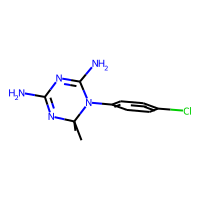
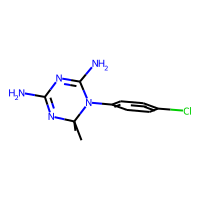
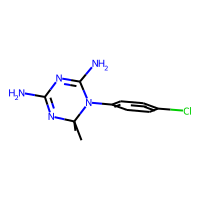
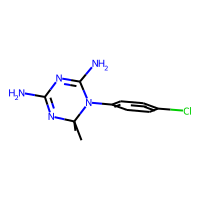
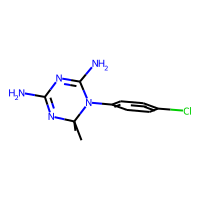
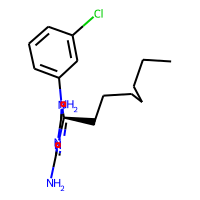
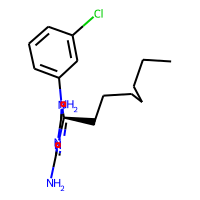
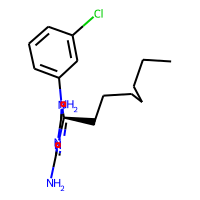
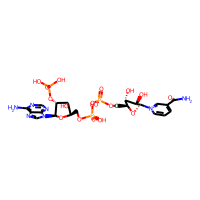
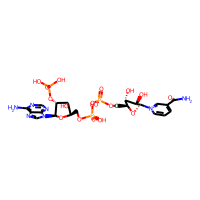

In [3]:
zinc_plasmodium_sdf

### Preprocessing the data

#### Processing the variables

We need to convert the 'ROMol' column to SMILES in order to work with them in the future. We also need to convert the affinity to a float number. Reorganizing the dataframe, we have:

In [4]:
smiles = []

for i, compound in zinc_plasmodium_sdf.iterrows():
    smiles.append(Chem.MolToSmiles(compound['ROMol']))

zinc_plasmodium_sdf['smiles'] = smiles
zinc_plasmodium_sdf.drop(['ROMol','ortholog_name', 'reference.doi', 'reference.journal', 'title'], axis=1, inplace=True)

In [5]:
zinc_plasmodium_sdf = zinc_plasmodium_sdf[['zinc_id', 'affinity', 'smiles', 'gene_name', 'chembldocid', 'reference.pubmed_id', 'reference.chembl_id', 'reference.year']]
zinc_plasmodium_sdf

,zinc_id,affinity,smiles,gene_name,chembldocid,reference.pubmed_id,reference.chembl_id,reference.year
0,ZINC000000001233,8.96,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004
1,ZINC000000001233,8.82,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,15522,10893311,CHEMBL1133696,2000
2,ZINC000000001233,8.82,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004
3,ZINC000000001233,8.80,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,17071,12825927,CHEMBL1145823,2003
4,ZINC000000001233,5.94,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,17071,12825927,CHEMBL1145823,2003
...,...,...,...,...,...,...,...,...
1138,ZINC000034801986,6.48,CCCCCCC[C@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004
1139,ZINC000034801986,8.40,CCCCCCC[C@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004
1140,ZINC000034801986,7.40,CCCCCCC[C@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004
1141,ZINC000095600434,7.84,NC(=O)c1ccc[n+]([C@H]2O[C@@H](CO[P@@](=O)(O)O[...,DRTS_PLAFK,14888,9554869,CHEMBL1131602,1998


Changing the `affinity` variable to a float number.

In [6]:
zinc_plasmodium_sdf = zinc_plasmodium_sdf.astype({'affinity':'float64'})
zinc_plasmodium_sdf.dtypes

zinc_id                 object
affinity               float64
smiles                  object
gene_name               object
chembldocid             object
reference.pubmed_id     object
reference.chembl_id     object
reference.year          object
dtype: object

We now take the mean of the affinity and save it in another object `[...]_mean`

In [7]:
zinc_plasmodium_sdf_mean = zinc_plasmodium_sdf[['zinc_id', 'affinity']].groupby('zinc_id').mean().reset_index()

#### Dropping NA values

In [8]:
zinc_plasmodium_sdf.dropna(how='any', axis=0, inplace=True)
print(f'After removing the NAs of zinc_plasmodium_sdf: {zinc_plasmodium_sdf.shape}')

After removing the NAs of zinc_plasmodium_sdf: (1143, 8)


In [9]:
zinc_plasmodium_sdf_mean.dropna(how='any', axis=0, inplace=True)
print(f'After dropping NAs of zinc_plasmodium_mean: {zinc_plasmodium_sdf_mean.shape}')

After dropping NAs of zinc_plasmodium_mean: (185, 2)


#### Merging the two datasets

First we need to select only the *'last'* duplicate of `zinc_plasmodium_sdf` and then merge the `zinc_plasmodium_mean` variable using the `zinc_id`

Dropping the duplicates:

In [10]:
zinc_plasmodium_sdf.drop_duplicates('zinc_id', keep='first', inplace=True)
zinc_plasmodium_sdf.shape

(185, 8)

Renaming the `affinity` variable:

In [11]:
zinc_plasmodium_sdf.rename(columns={'affinity':'first_affinity'}, inplace=True)
zinc_plasmodium_sdf.reset_index()

,index,zinc_id,first_affinity,smiles,gene_name,chembldocid,reference.pubmed_id,reference.chembl_id,reference.year
0,0,ZINC000000001233,8.96,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004
1,20,ZINC000000001409,9.10,CCc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004
2,28,ZINC000000010466,5.86,COc1cc(Cc2cnc(N)nc2N)ccc1OCc1ccccc1,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004
3,39,ZINC000000024946,7.94,COc1ccc(Cc2cnc(N)nc2N)cc1OC,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004
4,42,ZINC000000040057,7.00,Nc1ncc(-c2ccccc2)c(N)n1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004
...,...,...,...,...,...,...,...,...,...
180,1111,ZINC000034801983,5.86,CCCCCCCOc1ccc(Cc2cnc(N)nc2N)cc1,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004
181,1115,ZINC000034801984,6.99,CCCCCCCOc1cc(Cc2cnc(N)nc2N)ccc1OC,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004
182,1119,ZINC000034801985,9.52,CCCCCCC[C@@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004
183,1130,ZINC000034801986,9.52,CCCCCCC[C@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004


Merging the two datasets and reorganizing order of the variables for easiness of reading.

In [12]:
# Renaming the mean affinity table
zinc_plasmodium_sdf_mean = zinc_plasmodium_sdf_mean.rename(columns={'affinity':'mean_affinity'})

# Merging the two datasets
zinc_plasmodium_merged = pd.merge(zinc_plasmodium_sdf, zinc_plasmodium_sdf_mean, how='left', on='zinc_id')

# Taking a peek
zinc_plasmodium_merged

,zinc_id,first_affinity,smiles,gene_name,chembldocid,reference.pubmed_id,reference.chembl_id,reference.year,mean_affinity
0,ZINC000000001233,8.96,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004,6.977000
1,ZINC000000001409,9.10,CCc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004,8.278750
2,ZINC000000010466,5.86,COc1cc(Cc2cnc(N)nc2N)ccc1OCc1ccccc1,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004,6.878182
3,ZINC000000024946,7.94,COc1ccc(Cc2cnc(N)nc2N)cc1OC,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004,6.716667
4,ZINC000000040057,7.00,Nc1ncc(-c2ccccc2)c(N)n1,DRTS_PLAFK,21047,15293997,CHEMBL1138679,2004,7.147500
...,...,...,...,...,...,...,...,...,...
180,ZINC000034801983,5.86,CCCCCCCOc1ccc(Cc2cnc(N)nc2N)cc1,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004,6.495000
181,ZINC000034801984,6.99,CCCCCCCOc1cc(Cc2cnc(N)nc2N)ccc1OC,DRTS_PLAFK,17636,14711307,CHEMBL1148379,2004,7.095000
182,ZINC000034801985,9.52,CCCCCCC[C@@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004,7.811818
183,ZINC000034801986,9.52,CCCCCCC[C@H]1N=C(N)N=C(N)N1c1cccc(Cl)c1,DRTS_PLAFK,17662,14736247,CHEMBL1138835,2004,7.811818


In [13]:
# Reordering the variables:
zinc_plasmodium_merged = zinc_plasmodium_merged[['zinc_id', 'smiles', 'first_affinity', 'mean_affinity', 'chembldocid', 'reference.pubmed_id', 'reference.chembl_id', 'reference.year']]

zinc_plasmodium_merged.head(3)

,zinc_id,smiles,first_affinity,mean_affinity,chembldocid,reference.pubmed_id,reference.chembl_id,reference.year
0,ZINC000000001233,CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1,8.96,6.977000,21047,15293997,CHEMBL1138679,2004
1,ZINC000000001409,CCc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1,9.10,8.278750,21047,15293997,CHEMBL1138679,2004
2,ZINC000000010466,COc1cc(Cc2cnc(N)nc2N)ccc1OCc1ccccc1,5.86,6.878182,17636,14711307,CHEMBL1148379,2004


Ok! So now we're ready to save the preprocessed dataset and do some exploratory data analysis!

### Take a look at the distribution of the data

array([[<AxesSubplot: title={'center': 'first_affinity'}>]], dtype=object)

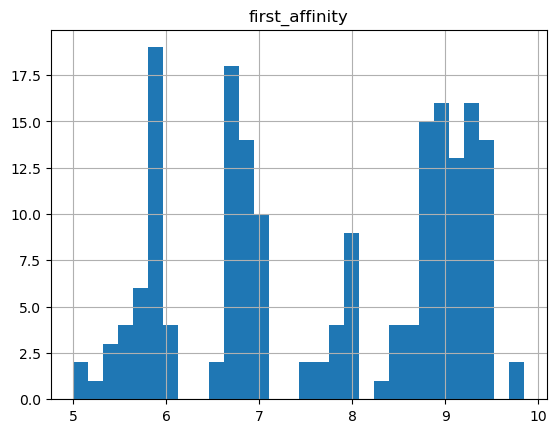

In [14]:
# Taking a peek into the distribution of the mean and last affinity, if it changes too much.
zinc_plasmodium_merged.hist(column='first_affinity', bins = 30)

array([[<AxesSubplot: title={'center': 'mean_affinity'}>]], dtype=object)

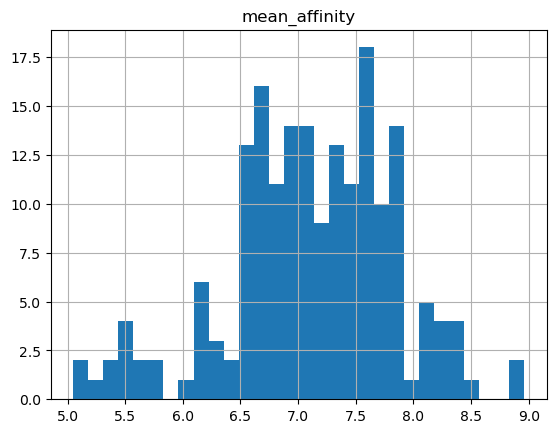

In [15]:
zinc_plasmodium_merged.hist(column='mean_affinity', bins = 30)

### Saving the output

In [16]:
zinc_plasmodium_merged.to_csv('data/plasmodium_dhfr_zinc_structures.csv')